# MULTI CLASS Logistic Regression - Example


Scikit-learn is a free machine learning library for python. We can easily implement logistic regression with [Scikit-learn](https://www.google.com/search?q=scikit+learn&rlz=1C5CHFA_enES992ES992&oq=scikit+learn&gs_lcrp=EgZjaHJvbWUyDggAEEUYJxg5GIAEGIoFMgwIARAjGCcYgAQYigUyBwgCEAAYgAQyBwgDEAAYgAQyBwgEEAAYgAQyBwgFEAAYgAQyBggGEEUYPDIGCAcQRRg90gEIMjMxMWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8) using the LogisticRegression class. 

After creating a logistic regression object, we can obtain the line that best fits our data by calling the fit method. You can learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In this case we want to generate a multiple-classes classifier, to do so we replicate two different algorithms: 
- **Multinomial Logistic Regression:** Extend the Logistic Regression model from a simple binary classification to multiple-class classification.
- **One vs All:**  For each class, fit a logistic regression model to distinguish that class from all other classes.

In [14]:
# First things first, we always need to import the libraries. 
from sklearn import datasets
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

# IRIS CLASSIFICATION - SETOS, VERSICOLOR OR VIRGINICA?

## 1. Getting the data
Today we are dealing with some real-world data to apply our brand new logistic regression model. 
The second example we will see together is how to classify three different species of Iris - Setos, Versicolor and Virginica. 
We are using a Kaggle [Iris dataset](https://www.kaggle.com/datasets/uciml/iris).

In [15]:
# Load Iris dataset
df = pd.read_csv("Files/Logistic_regression/Iris.csv")
df = df.drop(columns=["Id"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2. Some first analysis
Some first analysis to further get the idea of what data we have in out table.

In [16]:
# Checking our dataset
df.describe() #describes are data 

df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_70359/847497268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Species"], palette=["purple", "blue", "green"])


<Axes: xlabel='count', ylabel='Species'>

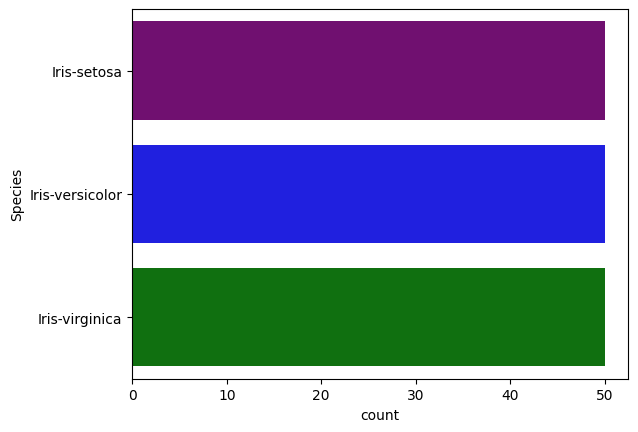

In [17]:
#We can check the distribution of individuals we have for each specie. Remember that strongly imabalanced datasets can be a problem. 
print(df["Species"].value_counts())
sns.countplot(df["Species"], palette=["purple", "blue", "green"])

## 3. Understanding our data
### HEATMAP
To understand what variables have a strong impact in our penguin species, we can use different commands. The first one is a Heat Map, that visually represents the correlation between all pairs of numeric columns within our DataFrame. The correlation range to 1 to -1 and indicates the strength and direction of their relationship.

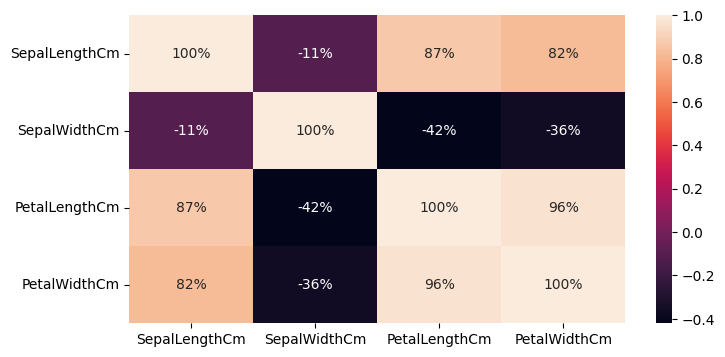

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))

import seaborn as sns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()

### PAIR PLOT
It generates a grid of scatter plots, each showing the relationship between two different variables in the dataset and with colors based on species. This provides an overview of how different variables interact and how these interactions vary by species.###

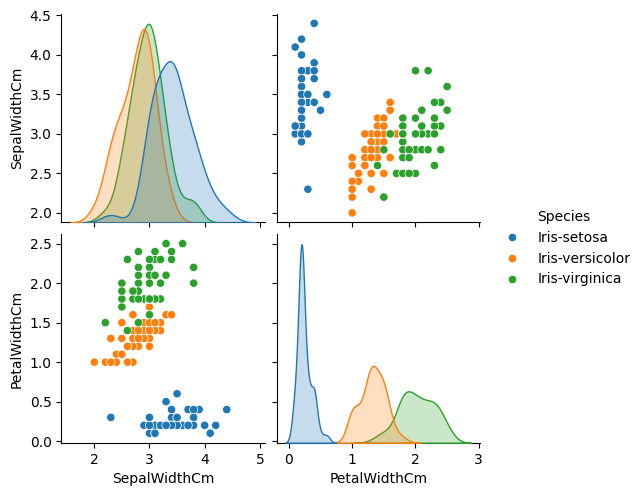

In [19]:
#let Create a pair plot of some columns 
df_temp = df.drop(columns=["SepalLengthCm", "PetalLengthCm"])
sns.pairplot(df_temp.iloc[:,:],hue='Species')  # graph also  tell us about the the realationship between the two columns 

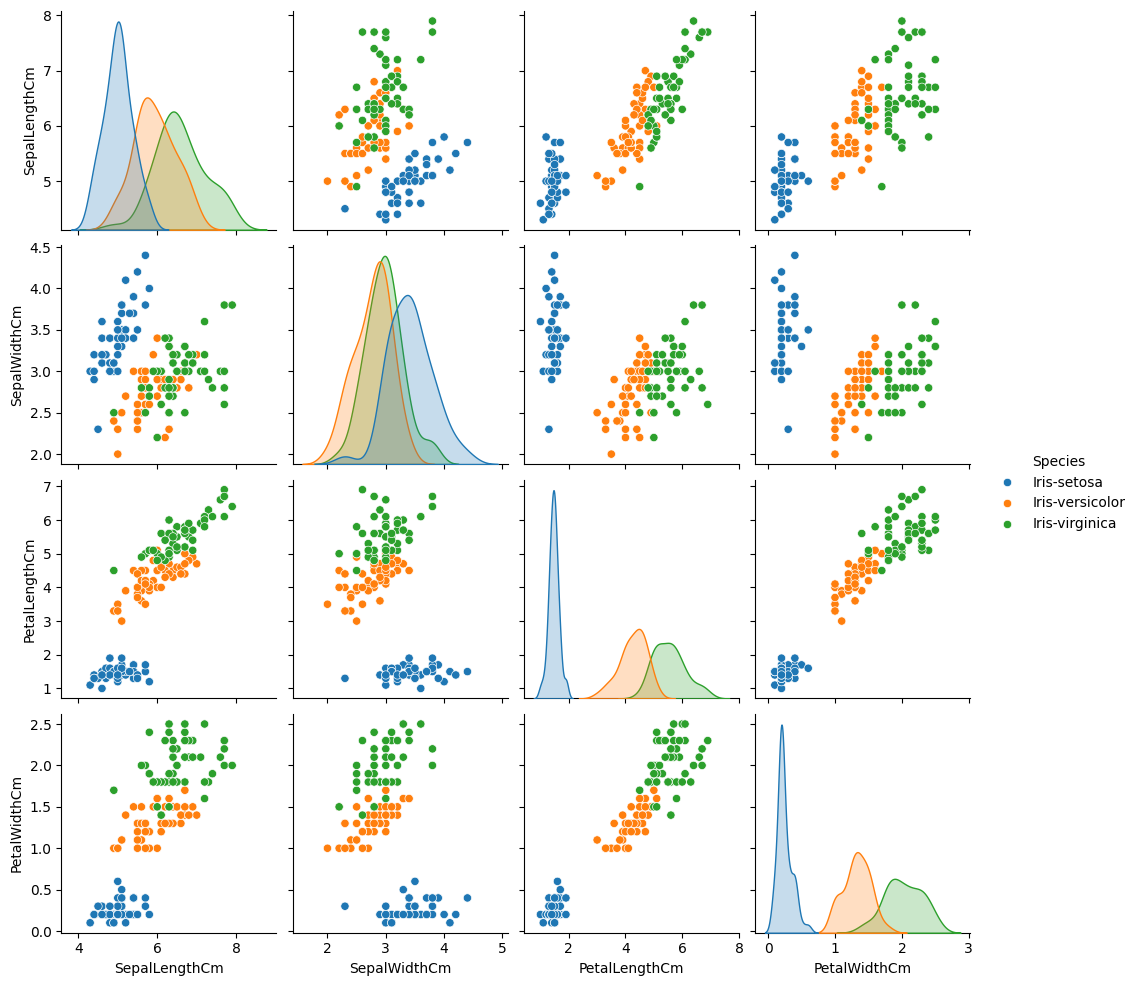

In [20]:
#let Create a pair plot of some columns 
sns.pairplot(df.iloc[:,:],hue='Species')  # graph also  tell us about the the realationship between the two columns 

# FIRST CLASSIFICATION - 1 Variable to 3 classes

We encode the Species variable to an integer variable. 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


Accuracy:  0.92
A weights: 
 [[-3.22847856]
 [ 0.142276  ]
 [ 3.08620256]] 
B weights: 
 [ 3.53439605  0.56558859 -4.09998464]
Confusion Matrix: 
 [[22  0  0]
 [ 0 25  4]
 [ 0  2 22]]


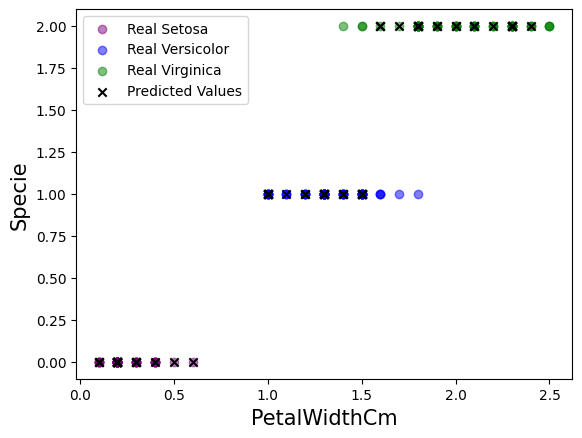

In [22]:
# We need to encode our species variable in a numerical one. We can use the LabelEncoder from scikit-learn to encode our species into 0, 1 and 2. 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])


# Select the features and the target variable
X = df[['PetalWidthCm']]
Y = df["Species_Encoded"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, Y_train)

# Create a range of values for X to plot the sigmoid function smoothly
X_range = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)
Y_predicted = log.predict(X_test)

X_setosa     = df[df["Species_Encoded"]==0]['PetalWidthCm'].values
X_versicolor = df[df["Species_Encoded"]==1]['PetalWidthCm'].values
X_virginica  = df[df["Species_Encoded"]==2]['PetalWidthCm'].values

# Plot the actual values colored by class
plt.scatter(X_setosa,     Y[Y == 0], label='Real Setosa', color='purple', alpha=0.5)
plt.scatter(X_versicolor, Y[Y == 1], label='Real Versicolor', color='blue', alpha=0.5)
plt.scatter(X_virginica,  Y[Y == 2], label='Real Virginica', color='green', alpha=0.5)

plt.scatter(X_test,     Y_predicted, label='Predicted Values', color='black', marker="x")


plt.xlabel("PetalWidthCm",fontsize=15)
plt.ylabel("Specie",fontsize=15)


# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("Accuracy: ", accuracy)
print("A weights: \n", log.coef_, "\nB weights: \n", log.intercept_)
print("Confusion Matrix: \n", confusion_matrix(Y_test, Y_predicted))


# Show the plot with legends
plt.legend()
plt.show()

# SECOND CLASSIFICATION - 2 Variable to 3 classes
## Multinomial Logistic Regression
We define the multinomial logisitc regression with the multi_class = 'multinomial'

A:  [[-2.81826791  1.07924419]
 [-0.07291053 -1.0254958 ]
 [ 2.89117844 -0.05374839]] B:  [-0.22278982  3.88355936 -3.66076954]
Accuracy:  0.8933333333333333


/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


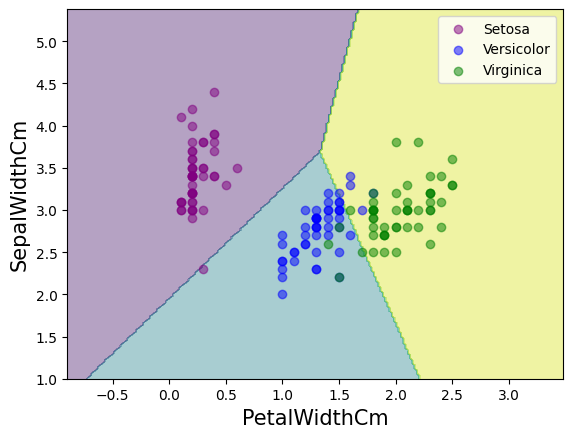

In [23]:
# We need to encode our species variable in a numerical one. We can use the LabelEncoder from scikit-learn to encode our species into 0, 1 and 2. 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])


# Select the features and the target variable
X = df[['PetalWidthCm','SepalWidthCm']]
Y = df["Species_Encoded"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log.fit(X_train, Y_train)

# Create a grid to generate a matrix like view
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# We predict all points to plot the decision boundary
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# We define each specie
X1_setosa = df[df["Species_Encoded"]==0]['PetalWidthCm'].values
X2_setosa = df[df["Species_Encoded"]==0]['SepalWidthCm'].values

X1_versicolor = df[df["Species_Encoded"]==1]['PetalWidthCm'].values
X2_versicolor = df[df["Species_Encoded"]==1]['SepalWidthCm'].values

X1_virginica = df[df["Species_Encoded"]==2]['PetalWidthCm'].values
X2_virginica = df[df["Species_Encoded"]==2]['SepalWidthCm'].values


# Plot the scatter plot
plt.scatter(X1_setosa, X2_setosa, label='Setosa', color='purple', alpha=0.5)
plt.scatter(X1_versicolor, X2_versicolor, label='Versicolor', color='blue', alpha=0.5)
plt.scatter(X1_virginica, X2_virginica, label='Virginica', color='green', alpha=0.5)
plt.xlabel("PetalWidthCm",fontsize=15)
plt.ylabel("SepalWidthCm",fontsize=15)
plt.legend()

# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("A: ", log.coef_, "B: ", log.intercept_)
print("Accuracy: ", accuracy)


In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# ... [your existing code] ...

# Predict probabilities for X_test
Y_pred_proba = log.predict_proba(X_test)[:, 1]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, log.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[21  1  0]
 [ 0 25  4]
 [ 0  3 21]]


## One versus ALl
We define the multinomial logisitc regression with the multi_class = 'ovr'

A:  [[-3.2583606   1.36837978]
 [ 0.06441703 -2.05517646]
 [ 3.29718421  0.1584755 ]] B:  [-1.67235689  5.27786876 -5.85651821]
Accuracy:  0.84


/Users/josepferrersanchez/.pyenv/versions/3.10.11/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


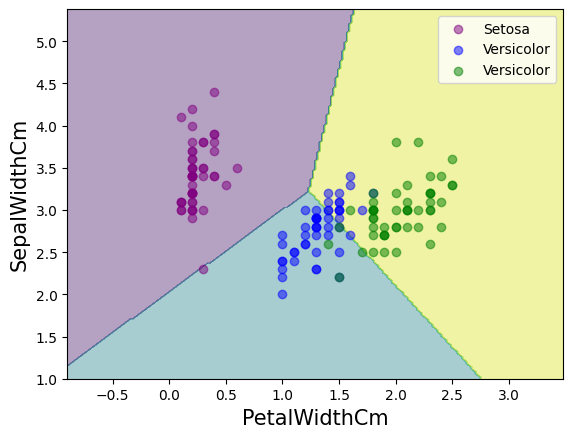

In [25]:
# We need to encode our species variable in a numerical one. We can use the LabelEncoder from scikit-learn to encode our species into 0, 1 and 2. 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

le = LabelEncoder()
df['Species_Encoded'] = le.fit_transform(df['Species'])


# Select the features and the target variable
X = df[['PetalWidthCm','SepalWidthCm']]
Y = df["Species_Encoded"]

# Splitting into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=41)

# Fit the Logistic Regression model
log = LogisticRegression(multi_class='ovr')
log.fit(X_train, Y_train)

# Create a grid to generate a matrix like view
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# We predict all points to plot the decision boundary
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# We define each specie
X1_setosa = df[df["Species_Encoded"]==0]['PetalWidthCm'].values
X2_setosa = df[df["Species_Encoded"]==0]['SepalWidthCm'].values

X1_versicolor = df[df["Species_Encoded"]==1]['PetalWidthCm'].values
X2_versicolor = df[df["Species_Encoded"]==1]['SepalWidthCm'].values

X1_virginica = df[df["Species_Encoded"]==2]['PetalWidthCm'].values
X2_virginica = df[df["Species_Encoded"]==2]['SepalWidthCm'].values


# Plot the scatter plot
plt.scatter(X1_setosa, X2_setosa, label='Setosa', color='purple', alpha=0.5)
plt.scatter(X1_versicolor, X2_versicolor, label='Versicolor', color='blue', alpha=0.5)
plt.scatter(X1_virginica, X2_virginica, label='Versicolor', color='green', alpha=0.5)
plt.xlabel("PetalWidthCm",fontsize=15)
plt.ylabel("SepalWidthCm",fontsize=15)
plt.legend()

# Checking our accuracy
accuracy = log.score(X_test, Y_test)
print("A: ", log.coef_, "B: ", log.intercept_)
print("Accuracy: ", accuracy)
